# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Read the Data

In [69]:
data = pd.read_csv('./data/cost_revenue_dirty.csv')

# Explore and Clean the Data

In [70]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [71]:
print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns.")
print(f"Does dataset has NaN Values? [{data.isna().values.any()}]")
print(f"Does dataset have duplicate rows? [{data.duplicated().values.any()}]")
print(f"Datatype of columns:\n{data.dtypes}")

Dataset has 5391 rows and 6 columns.
Does dataset has NaN Values? [False]
Does dataset have duplicate rows? [False]
Datatype of columns:
Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [72]:
# Cleaning
data["USD_Production_Budget"] = data["USD_Production_Budget"].astype(str).str.replace("$", "").str.replace(",", "")
data["USD_Worldwide_Gross"] = data["USD_Worldwide_Gross"].astype(str).str.replace("$", "").str.replace(",", "")
data["USD_Domestic_Gross"] = data["USD_Worldwide_Gross"].astype(str).str.replace("$", "").str.replace(",", "")

# Conversions
data["USD_Production_Budget"] = pd.to_numeric(data["USD_Production_Budget"])
data["USD_Worldwide_Gross"] = pd.to_numeric(data["USD_Worldwide_Gross"])
data["USD_Domestic_Gross"] = pd.to_numeric(data["USD_Domestic_Gross"])

data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget     int64
USD_Worldwide_Gross       int64
USD_Domestic_Gross        int64
dtype: object

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [91]:
data["Release_Date"] = pd.to_datetime(data["Release_Date"])
data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [75]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Rank,"5,391.00","2,696.00",1.00,"1,348.50","2,696.00","4,043.50","5,391.00","1,556.39"
Release_Date,5391,2003-09-19 15:02:02.203672704,1915-08-02 00:00:00,1999-12-02 12:00:00,2006-06-23 00:00:00,2011-11-23 00:00:00,2020-12-31 00:00:00,NaN
USD_Production_Budget,"5,391.00","31,113,737.58","1,100.00","5,000,000.00","17,000,000.00","40,000,000.00","425,000,000.00","40,523,796.88"
USD_Worldwide_Gross,"5,391.00","88,855,421.96",0.00,"3,865,206.00","27,450,453.00","96,454,455.00","2,783,918,982.00","168,457,757.00"
USD_Domestic_Gross,"5,391.00","88,855,421.96",0.00,"3,865,206.00","27,450,453.00","96,454,455.00","2,783,918,982.00","168,457,757.00"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [76]:
zero_domestic: pd.DataFrame = data[data["USD_Domestic_Gross"] == 0]
zero_domestic = zero_domestic.sort_values(by="USD_Production_Budget", ascending=False)
print(f"Number of films that made 0$ domestically: {len(zero_domestic)}")
zero_domestic

Number of films that made 0$ domestically: 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [80]:
zero_worldwide: pd.DataFrame = data[data["USD_Worldwide_Gross"] == 0]
zero_worldwide = zero_worldwide.sort_values(by="USD_Production_Budget", ascending=False)
print(f"Number of films that made 0$ worldwide: {len(zero_worldwide)}")
zero_worldwide

Number of films that made 0$ worldwide: 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

So far, we've created subsets for our DataFrames based on a single condition. But what if we want to select our data based on more than one condition? For example, which films made money internationally (i.e., data.USD_Worldwide_Gross != 0), but had zero box office revenue in the United States (i.e., data.USD_Domestic_Gross == 0)? 

How would we create a filter for these two conditions? One approach is to use the `.loc[]` property combined with the [bitwise](https://docs.python.org/3.4/library/operator.html#mapping-operators-to-functions) and `&` operator.

In [82]:
only_zero_domestically = data.loc[(data["USD_Domestic_Gross"] == 0) & (data["USD_Worldwide_Gross"] != 0)]
only_zero_domestically

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [88]:
only_zero_domestically_query = data.query("USD_Worldwide_Gross != 0 and USD_Domestic_Gross == 0")
only_zero_domestically_query

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [94]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
future_releases = data[data["Release_Date"] > scrape_date]
future_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [97]:
# We will work on clean dataframe
data_cleaned = data.drop(future_releases.index)
data_cleaned.shape

(5384, 6)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [98]:
data_cleaned.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,384.00",5384,"5,384.00","5,384.00","5,384.00"
mean,"2,698.11",2003-09-12 00:26:12.659732480,"31,038,476.84","88,970,947.21","88,970,947.21"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,351.75",1999-12-02 00:00:00,"5,000,000.00","3,929,036.00","3,929,036.00"
50%,"2,698.50",2006-06-16 00:00:00,"17,000,000.00","27,537,329.00","27,537,329.00"
75%,"4,045.25",2011-11-18 00:00:00,"40,000,000.00","96,641,996.25","96,641,996.25"
max,"5,391.00",2017-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","2,783,918,982.00"
std,"1,555.79",NaN,"40,440,041.47","168,536,755.89","168,536,755.89"


In [102]:
budget_over_worldwide_gross = data_cleaned[data_cleaned["USD_Production_Budget"] > data_cleaned["USD_Worldwide_Gross"]]
print(f"Number of films that there budget exceed the revenue: {len(budget_over_worldwide_gross)}")
print(f"Percentage: {len(budget_over_worldwide_gross) / len(data_cleaned)}")
budget_over_worldwide_gross

Number of films that there budget exceed the revenue: 2007
Percentage: 0.37277117384843983


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,165049
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
...,...,...,...,...,...,...
5371,4901,2017-07-28,An Inconvenient Sequel,1000000,130874,130874
5373,2161,2017-08-25,Tulip Fever,25000000,0,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,36630
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,140012608


# Seaborn for Data Viz: Bubble Charts

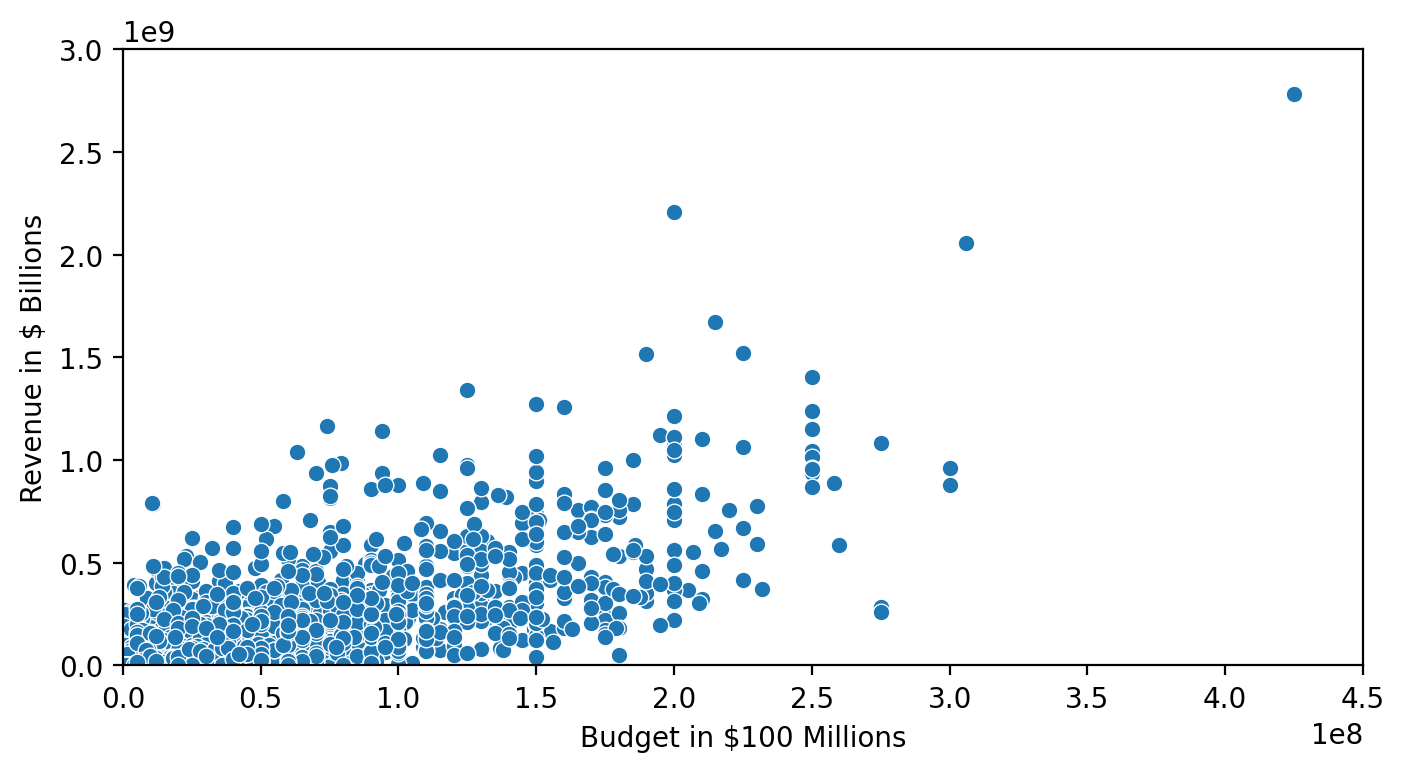

In [125]:
# Seaborn is built on top of Matplotlib

plt.figure(figsize=(8, 4), dpi=200)

fig = sns.scatterplot(
    data=data_cleaned,
    x="USD_Production_Budget",
    y="USD_Worldwide_Gross"
)

fig.set(
    ylim=(0, 3000000000),
    xlim=(0, 450000000),
    xlabel="Budget in $100 Millions",
    ylabel="Revenue in $ Billions"
)

plt.show()

Seaborn Built on top of Matplotlib
<br>
<img src="./images/scatter_returns.png">

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



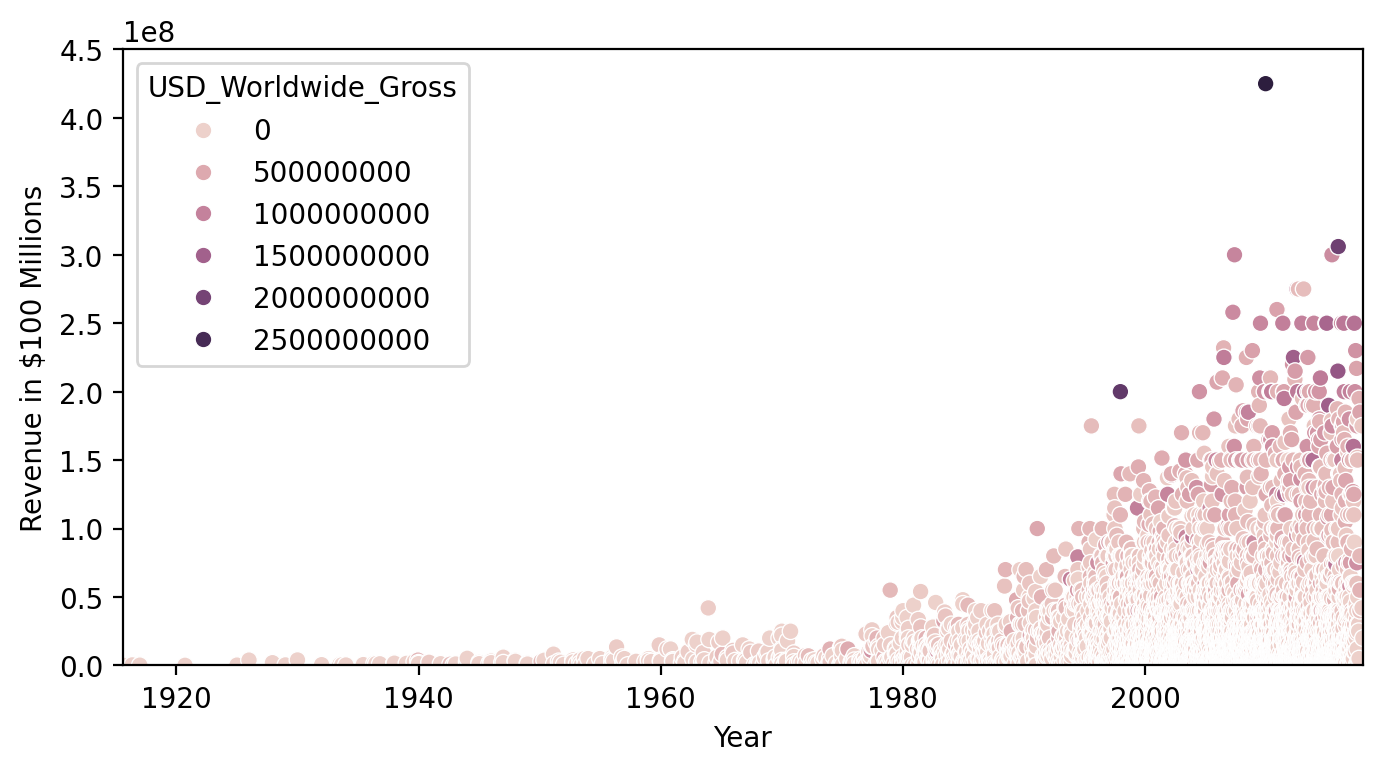

In [134]:
plt.figure(figsize=(8, 4), dpi=200)

fig_bubble = sns.scatterplot(
    data=data_cleaned,
    x="Release_Date",
    y="USD_Production_Budget",
    hue="USD_Worldwide_Gross"
)

fig_bubble.set(
    xlim=(data_cleaned.Release_Date.min(), data_cleaned.Release_Date.max()),
    ylim=(0, 450000000),
    xlabel="Year",
    ylabel="Revenue in $100 Millions"
)

plt.show()  # Small budgets = few films, More releases = Growing budgets

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. <br>
4. Use floor division `//` to convert the year data to the decades of the films.
5. Add the decades as a `Decade` column to the `data_clean` DataFrame.

### pd.DatetimeIndex:
[Source](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html)

In [137]:
dt_index = pd.DatetimeIndex(data_cleaned["Release_Date"])
years = dt_index.year
decades = (years // 10) * 10
data_cleaned["Decade"] = decades
# OR: years - (years % 10)
data_cleaned.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,166893990,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,561137727,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,140012608,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,57850343,2010
5383,2521,2017-12-31,The Thousand Miles,20000000,0,0,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [149]:
old_films = data_cleaned[data_cleaned.Decade <= 1969]
new_films = data_cleaned[data_cleaned.Decade > 1970]
old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153,153.00,153.00,153.00,153.00
mean,"4,274.77",1954-06-10 04:04:42.352941184,"4,611,297.65","30,419,634.38","30,419,634.38","1,949.15"
min,"1,253.00",1915-08-02 00:00:00,"100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00",1946-01-01 00:00:00,"1,250,000.00","5,273,000.00","5,273,000.00","1,940.00"
50%,"4,434.00",1956-12-23 00:00:00,"2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00",1964-10-22 00:00:00,"5,000,000.00","33,208,099.00","33,208,099.00","1,960.00"
max,"5,299.00",1969-12-19 00:00:00,"42,000,000.00","390,525,192.00","390,525,192.00","1,960.00"
std,742.14,NaN,"5,713,648.85","54,931,828.93","54,931,828.93",12.72


In [150]:
old_films.sort_values(by="USD_Production_Budget", ascending=False)  # cleopatra was most expensive

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,71000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
...,...,...,...,...,...,...,...
147,5228,1969-07-25,The Stewardesses,200000,25000000,25000000,1960
29,5283,1942-11-16,Cat People,134000,8000000,8000000,1940
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,30000000,1960
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,11000000,1910


In [144]:
new_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,"5,122.00",5122,"5,122.00","5,122.00","5,122.00","5,122.00"
mean,"2,627.78",2005-10-06 09:36:20.242092928,"32,303,670.64","91,101,526.25","91,101,526.25","2,000.83"
min,1.00,1980-01-01 00:00:00,"1,100.00",0.00,0.00,"1,980.00"
25%,"1,288.25",2000-12-05 00:00:00,"5,500,000.00","3,618,183.25","3,618,183.25","2,000.00"
50%,"2,589.50",2006-12-17 12:00:00,"18,000,000.00","28,612,667.00","28,612,667.00","2,000.00"
75%,"3,938.75",2012-02-22 06:00:00,"40,000,000.00","99,003,897.75","99,003,897.75","2,010.00"
max,"5,391.00",2017-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","2,783,918,982.00","2,010.00"
std,"1,549.76",NaN,"41,026,266.68","171,406,401.64","171,406,401.64",8.60


# Seaborn Regression Plots

Let's visualise the relationship between the movie budget and the worldwide revenue using linear regression. Seaborn makes this incredibly easy with the `.regplot()` function.

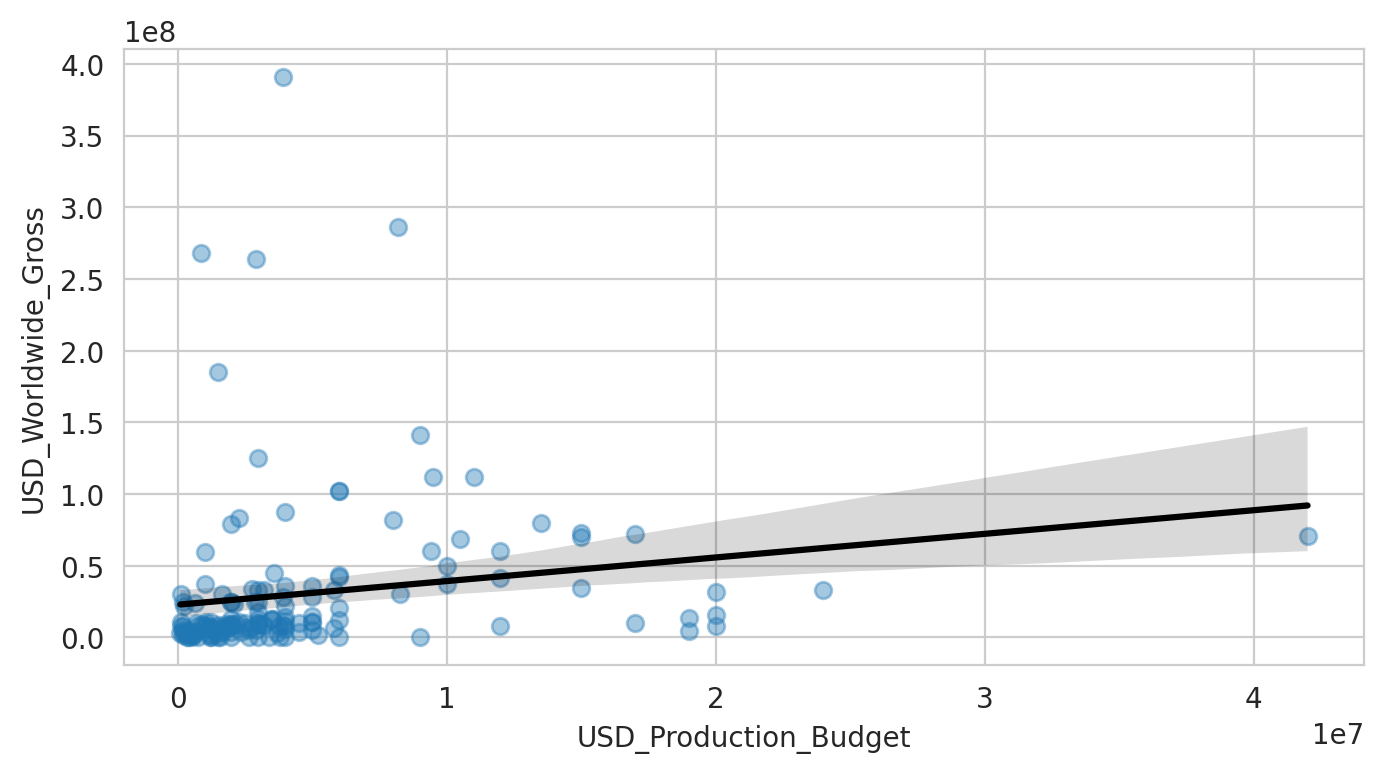

In [154]:
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style("whitegrid"):
    sns.regplot(
        old_films,
        x="USD_Production_Budget",
        y="USD_Worldwide_Gross",
        scatter_kws={"alpha": 0.4},
        line_kws={"color": "black"}
    )

plt.show()

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in  billions" and "Budget in  millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

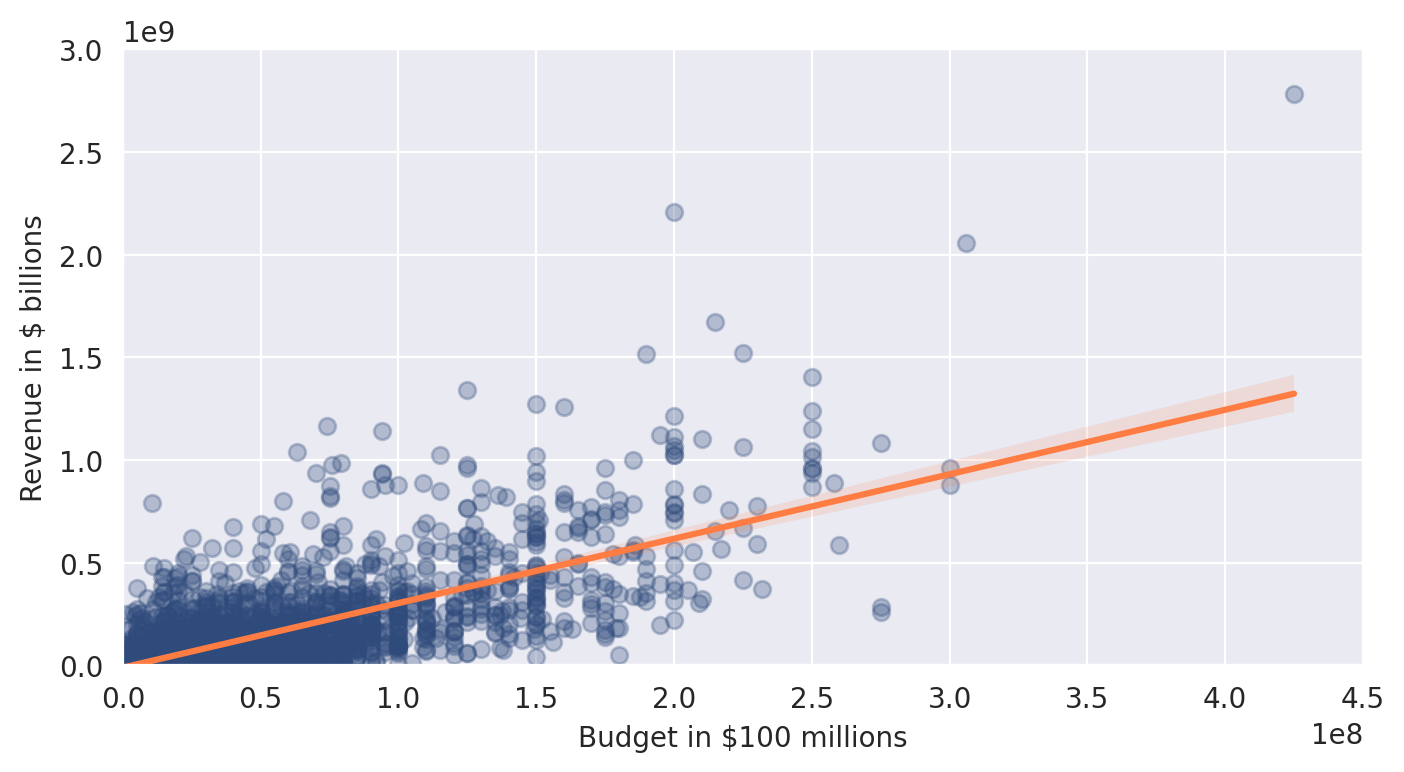

In [161]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions') 
  
plt.show()

# Run Your Own Regression with scikit-learn (Skipped)

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 